#**Treinando um Classificador de Raças de Cachorros**

##**Baixar e descompactar base de dados**

Aqui estamos usando uma base de dados já pronta que servirá para termos o nosso primeiro modelo de classificador.
Os dados são imagens, já separadas em pastas.

In [1]:
!wget https://s3.amazonaws.com/fast-ai-imageclas/imagewoof2.tgz

--2024-02-12 14:50:43--  https://s3.amazonaws.com/fast-ai-imageclas/imagewoof2.tgz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 54.231.196.112, 52.217.130.88, 52.217.129.160, ...
Connecting to s3.amazonaws.com (s3.amazonaws.com)|54.231.196.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1343715595 (1.3G) [application/x-tar]
Saving to: ‘imagewoof2.tgz’

imagewoof2.tgz      100%[===================>]   1.25G  34.3MB/s    in 38s     

2024-02-12 14:51:22 (33.6 MB/s) - ‘imagewoof2.tgz’ saved [1343715595/1343715595]



In [2]:
!tar zxvf imagewoof2.tgz

Streaming output truncated to the last 5000 lines.
imagewoof2/train/n02115641/n02115641_9529.JPEG
imagewoof2/train/n02115641/n02115641_12039.JPEG
imagewoof2/train/n02115641/n02115641_8768.JPEG
imagewoof2/train/n02115641/n02115641_7188.JPEG
imagewoof2/train/n02115641/n02115641_6633.JPEG
imagewoof2/train/n02115641/n02115641_25018.JPEG
imagewoof2/train/n02115641/n02115641_10706.JPEG
imagewoof2/train/n02115641/n02115641_11814.JPEG
imagewoof2/train/n02115641/n02115641_51135.JPEG
imagewoof2/train/n02115641/n02115641_7409.JPEG
imagewoof2/train/n02115641/n02115641_29257.JPEG
imagewoof2/train/n02115641/n02115641_17997.JPEG
imagewoof2/train/n02115641/n02115641_6473.JPEG
imagewoof2/train/n02115641/n02115641_2963.JPEG
imagewoof2/train/n02115641/n02115641_52488.JPEG
imagewoof2/train/n02115641/n02115641_6536.JPEG
imagewoof2/train/n02115641/n02115641_6166.JPEG
imagewoof2/train/n02115641/n02115641_21519.JPEG
imagewoof2/train/n02115641/n02115641_504.JPEG
imagewoof2/train/n02115641/n02115641_14084.JPEG


##**Instalação da Biblioteca deepfeatx**

Biblioteca que irá nos fornecer o acesso a rede base, que depois será "refinada" para se tornar um classificador de cachorros.

In [3]:
!pip install deepfeatx

##**Extraindo características a partir das imagens**

In [4]:
from deepfeatx.image import ImageFeatureExtractor

Definindo a rede base

In [5]:
fe = ImageFeatureExtractor('efficientnetb4')

71686520/71686520 [==============================] - 0s 0us/step


Fazendo o treinamento da rede

In [6]:
train = fe.extract_features_from_directory('/content/imagewoof2/train', classes_as_folders=True, export_class_names=True)

Found 9025 images belonging to 10 classes.
283/283 [==============================] - 2162s 8s/step


In [7]:
train.head()

,filepaths,classes,0,1,2,3,4,5,6,7,...,1782,1783,1784,1785,1786,1787,1788,1789,1790,1791
0,/content/imagewoof2/train/n02086240/ILSVRC2012...,n02086240,0.235262,-0.097540,0.160580,0.271798,0.132469,1.340622,-0.156224,0.014820,...,0.215442,0.158623,-0.201360,-0.204290,0.356231,0.118751,-0.154093,0.298171,-0.179607,-0.194276
1,/content/imagewoof2/train/n02086240/ILSVRC2012...,n02086240,0.149054,0.001021,-0.156537,-0.204830,0.105294,0.296550,-0.165714,-0.156713,...,0.504865,-0.136174,-0.146207,-0.236528,-0.211885,0.061007,-0.201124,-0.190740,-0.197862,-0.203315
2,/content/imagewoof2/train/n02086240/ILSVRC2012...,n02086240,-0.147829,-0.106674,-0.054261,0.146226,-0.199880,0.610693,-0.145839,-0.126743,...,-0.005726,-0.030085,-0.161286,-0.110479,-0.168665,0.013554,-0.167241,-0.071287,-0.101351,-0.145818
3,/content/imagewoof2/train/n02086240/ILSVRC2012...,n02086240,0.036387,0.102320,-0.176408,0.841934,-0.208296,0.064328,-0.208992,-0.145640,...,0.068088,-0.181513,-0.159000,-0.171961,0.044891,-0.038166,-0.219997,-0.180216,-0.236641,0.760273
4,/content/imagewoof2/train/n02086240/ILSVRC2012...,n02086240,0.475448,-0.179253,-0.155994,0.572201,0.241935,0.560770,-0.111134,-0.133343,...,0.251003,-0.056736,-0.180066,-0.197325,0.046671,0.263991,-0.217465,-0.186770,-0.195412,-0.168519


Fazendo a vetorização das imagens de teste, que depois serão comparadas com a vetorização realizada anteriormente na fase de treinamento para posteriormente realizar a verificação da eficiência do modelo.

In [8]:
test = fe.extract_features_from_directory('/content/imagewoof2/val', classes_as_folders=True, export_class_names=True)

Found 3929 images belonging to 10 classes.
123/123 [==============================] - 855s 7s/step


In [9]:
test.head()

,filepaths,classes,0,1,2,3,4,5,6,7,...,1782,1783,1784,1785,1786,1787,1788,1789,1790,1791
0,/content/imagewoof2/val/n02086240/ILSVRC2012_v...,n02086240,0.010032,-0.134886,-0.145639,0.219375,-0.187060,0.417244,-0.056434,-0.110010,...,0.057381,-0.049127,-0.164968,-0.228540,-0.178837,0.202133,-0.164508,-0.105748,-0.170468,-0.209100
1,/content/imagewoof2/val/n02086240/ILSVRC2012_v...,n02086240,-0.067581,-0.098246,0.075923,-0.055530,-0.069493,0.336248,-0.147553,-0.115740,...,0.199920,-0.165566,-0.171385,-0.233518,0.019978,0.137627,-0.166060,-0.120308,-0.193541,-0.079833
2,/content/imagewoof2/val/n02086240/ILSVRC2012_v...,n02086240,0.042435,-0.149943,-0.155567,0.851448,-0.023883,0.310434,-0.118888,-0.114958,...,0.628066,-0.166223,-0.154654,-0.214810,-0.149376,-0.001795,-0.192077,-0.163293,-0.161350,-0.222183
3,/content/imagewoof2/val/n02086240/ILSVRC2012_v...,n02086240,0.332426,-0.122655,-0.157069,0.216110,0.053469,-0.146146,-0.230143,-0.087101,...,0.350972,-0.101270,-0.175364,-0.205283,0.426783,0.399639,-0.195552,-0.087466,-0.228071,-0.089991
4,/content/imagewoof2/val/n02086240/ILSVRC2012_v...,n02086240,0.263282,-0.068650,-0.018986,0.022608,1.174893,0.177848,-0.096873,-0.134003,...,1.236459,0.235701,-0.053071,-0.034010,-0.116724,0.018900,-0.207200,-0.148729,-0.043675,-0.085650


##**Treinamento do modelo**

In [10]:
from sklearn.linear_model import LogisticRegression

In [11]:
X_train = train.drop(['filepaths', 'classes'], axis=1)
X_test = test.drop(['filepaths', 'classes'], axis=1)
y_train = train['classes']
y_test = test['classes']
lr = LogisticRegression().fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


##**Métricas**

A avaliação da eficiência de um modelo de deep learning é uma parte crucial do processo de desenvolvimento. Métricas desempenham um papel fundamental nesse processo, fornecendo insights quantitativos sobre o quão bem o modelo está performando em tarefas específicas. Aqui estão algumas razões pelas quais as métricas são essenciais na avaliação de modelos de deep learning:

-> Avaliação Objetiva: Métricas oferecem uma maneira objetiva de avaliar o desempenho do modelo. Elas convertem a qualidade do modelo em números, facilitando a comparação entre diferentes modelos ou configurações.

-> Tomada de Decisões Informada: Métricas ajudam na tomada de decisões informada sobre ajustes no modelo. Ao monitorar métricas durante o treinamento e a validação, os desenvolvedores podem identificar problemas, como overfitting ou underfitting, e ajustar hiperparâmetros para melhorar o desempenho do modelo.

-> Compreensão do Desempenho: Métricas fornecem uma compreensão clara do desempenho do modelo em diferentes aspectos. Por exemplo, em problemas de classificação, métricas como precisão, recall, F1-score e matriz de confusão oferecem insights sobre como o modelo lida com diferentes classes.

-> Ajuste de Objetivos: Dependendo do problema em questão, os objetivos podem variar. Métricas permitem ajustar o modelo com base nos requisitos específicos do problema, seja maximizando a precisão, minimizando o erro ou otimizando outras métricas relevantes.

-> Interpretabilidade e Explicabilidade: Em alguns casos, métricas podem ser usadas para medir a interpretabilidade ou explicabilidade do modelo. Isso é especialmente importante em aplicações onde a transparência é crucial, como na área de saúde ou finanças.

-> Comparação de Modelos: Métricas fornecem uma base para comparar diferentes modelos. Isso é útil não apenas durante o desenvolvimento, mas também ao escolher o melhor modelo para implantação em produção.

-> Feedback Iterativo: A análise das métricas fornece um feedback iterativo que pode ser usado para refinar continuamente o modelo. Esse processo iterativo é essencial para aprimorar a eficácia do modelo ao longo do tempo.

Em resumo, métricas desempenham um papel vital no processo de desenvolvimento de modelos de deep learning, fornecendo uma estrutura objetiva para avaliar e aprimorar o desempenho do modelo. A escolha das métricas certas depende do tipo de problema que está sendo abordado, e os desenvolvedores devem selecionar métricas relevantes para medir o sucesso de seus modelos de acordo com os objetivos específicos da tarefa.

In [12]:
# acurácia
lr.score(X_test, y_test)

0.9592771697632986

In [13]:
from sklearn.metrics import confusion_matrix

In [14]:
y_pred = lr.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[396,   0,   0,   0,   5,   0,   2,   5,   1,   0],
       [  0, 396,   0,   1,   3,   2,   4,   0,   0,   2],
       [  2,   3, 390,  19,   3,   0,   0,   0,   0,   1],
       [  2,   4,  21, 192,   1,   0,   1,   0,   0,   3],
       [  4,   1,   1,   0, 388,   5,   0,   1,   1,   0],
       [  2,   1,   0,   3,  10, 387,   0,   2,   0,   2],
       [  2,   2,   0,   1,   1,   2, 391,   0,   1,   1],
       [  5,   1,   0,   0,   0,   0,   1, 414,   1,   0],
       [  0,   0,   0,   0,   0,   0,   2,   2, 424,   1],
       [  1,   7,   1,   2,   3,   1,   4,   0,   0, 391]])

Para melhor visualização da matriz de confusão do modelo

<Axes: >

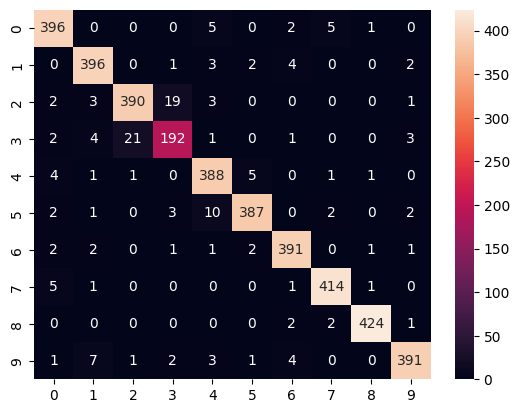

In [15]:
import seaborn as sns
sns.heatmap(cm, annot=True, fmt='g')